In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire
from prepare import train_val_test
from env import get_connection

import warnings
warnings.filterwarnings("ignore")

In [12]:
# All imports required to explore the data

In [67]:
telco = acquire.get_telco_data(get_connection)
telco = telco.drop(['Unnamed: 0','gender', 'senior_citizen', 'partner', 'phone_service', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'internet_service_type', 'online_security', 'online_backup', 
                    'device_protection', 'internet_service_type_id', 'customer_id'], axis =1)
telco
# Aquiring the Telco data and dropping unnecessary columns to give a dataframe containing the dataset

,payment_type_id,contract_type_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn,contract_type,payment_type
0,2,2,Yes,9,No,65.60,593.3,No,One year,Mailed check
1,2,1,No,9,Yes,59.90,542.4,No,Month-to-month,Mailed check
2,1,1,No,4,No,73.90,280.85,Yes,Month-to-month,Electronic check
3,1,1,No,13,No,98.00,1237.85,Yes,Month-to-month,Electronic check
4,2,1,No,3,No,83.90,267.4,Yes,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...
7038,2,2,No,13,No,55.15,742.9,No,One year,Mailed check
7039,1,1,No,22,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check
7040,2,1,No,2,No,50.30,92.75,No,Month-to-month,Mailed check
7041,2,3,Yes,67,No,67.85,4627.65,No,Two year,Mailed check


In [20]:
combos = (['payment_type_id', 'contract_type_id', 'dependents', 'multiple_lines'])
for var in combos:
    chi2, p, degf, expected = chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(telco['churn'], telco[var]))
    if p <= .05:
        print(f'Comparing relationship between churn and {var}')
        print(chi2, p)
        print('------------------')
        
# Using a chi2 test to determine the main drivers behind the churn at Telco 
# Does not include payments yet, have to drop na and make a seperate test below

Comparing relationship between churn and payment_type_id
648.1423274814 3.6823546520097993e-140
------------------
Comparing relationship between churn and contract_type_id
1184.5965720837926 5.863038300673391e-258
------------------
Comparing relationship between churn and dependents
189.12924940423474 4.9249216612154196e-43
------------------
Comparing relationship between churn and multiple_lines
11.33044148319756 0.0034643829548773
------------------


In [22]:
telco = telco.dropna()
telco['total_charges'] = telco['total_charges'].replace(' ', 0).astype(float)
# Dropping any null values and converting all the remaining numbers into floats
# Makes it easier to use stats to ttest the charges and churn

In [24]:
combos2 = ['monthly_charges', 'total_charges']
for var in combos2:
    churn = telco[telco['churn'] == 'Yes'][var]
    not_churned = telco[telco['churn'] == 'No'][var]
    t, p = stats.ttest_ind(churn, not_churned, equal_var = False)
    print(f'Comparing relationship between churn and {var}')
    print(t, p)
    print('------------------')

# T test for the charges because they we are comparing a catagorical variable to a continuous one
# The code will print the results in a similar format to the chi2 test above

Comparing relationship between churn and monthly_charges
18.407526676414673 8.59244933154705e-73
------------------
Comparing relationship between churn and total_charges
-18.70661828817703 5.902580609073978e-75
------------------


In [35]:
train, val, test = train_val_test(telco, 'churn')

In [36]:
X_train = train.drop(columns='churn')
y_train = train['churn']

X_val = val.drop(columns='churn')
y_val = val['churn']

X_test = test.drop(columns='churn')
y_test = test['churn']
# Creating splits for the data

In [37]:
train.head()

,payment_type_id,contract_type_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn,contract_type,payment_type
5609,1,1,No,14,No,76.45,1117.55,No,Month-to-month,Electronic check
2209,2,2,No,5,No,70.00,347.40,Yes,One year,Mailed check
6919,1,1,No,35,Yes,75.20,2576.20,Yes,Month-to-month,Electronic check
2284,1,3,No,58,Yes,86.10,4890.50,No,Two year,Electronic check
845,2,1,No,2,No,49.60,114.70,Yes,Month-to-month,Mailed check


<AxesSubplot:xlabel='contract_type', ylabel='count'>

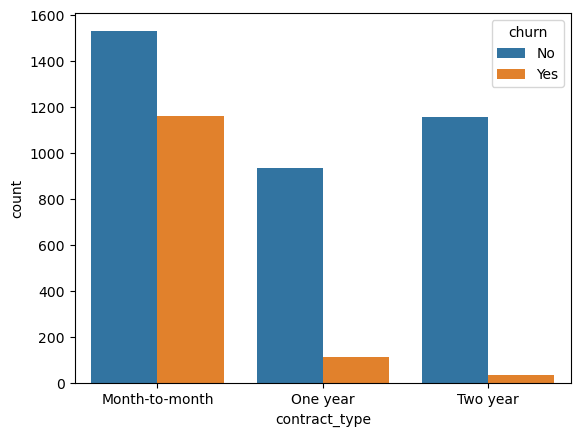

In [38]:
sns.countplot(x = train['contract_type'], hue = train['churn'])
# Creating a count plot for contract_type hued by churn to visualize churn by each contract type

<AxesSubplot:xlabel='count', ylabel='payment_type'>

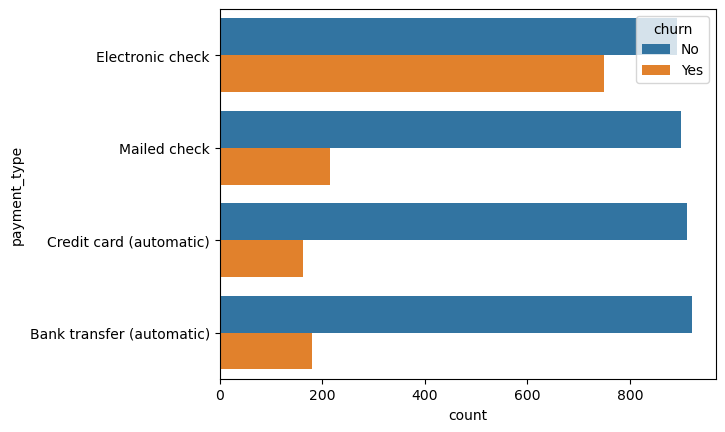

In [66]:
sns.countplot(y = train['payment_type'], hue = train['churn'])
#Count Plot that visualizes payment_type and the count of churn within each type of payment

<AxesSubplot:xlabel='dependents', ylabel='count'>

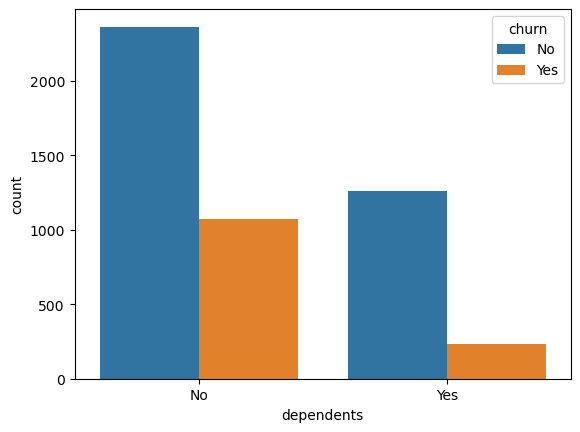

In [65]:
sns.countplot(x = train['dependents'], hue = train['churn'])
# Countplot for dependents

In [53]:
train[train.churn == 'No']['monthly_charges'].mean()

61.7664549972391

In [54]:
train[train.churn == 'Yes']['monthly_charges'].mean()

74.37148318042807

In [59]:
churn = train[train['churn'] == 'Yes']['monthly_charges']
not_churned = train[train['churn'] =='No']['monthly_charges']
# Creating alias for histogram of monthly charges

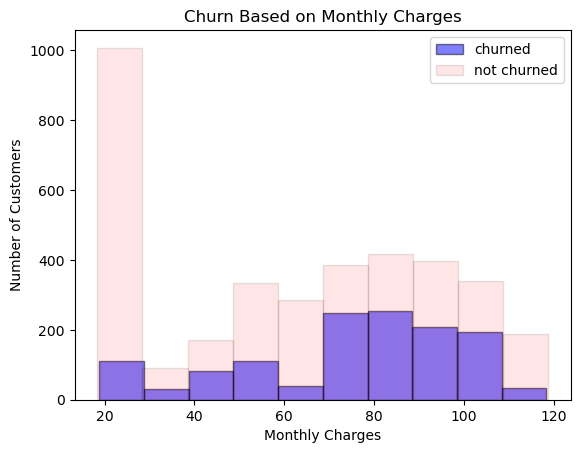

In [60]:
plt.hist(x = churn, color = 'blue', alpha = .5, edgecolor = 'black', label = 'churned')
plt.hist(x = not_churned, color = 'red', alpha = .1, edgecolor = 'black', label = 'not churned')
plt.legend(loc = 'upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Churn Based on Monthly Charges')
plt.show()
# Creating two histograms to overlay on each other using monthly charges
# Seperated by churn status

In [61]:
train[train.churn == 'No']['total_charges'].mean()

2590.3230121479837

In [58]:
train[train.churn == 'Yes']['total_charges'].mean()

1521.983906727829

In [62]:
churn = train[train['churn'] == 'Yes']['total_charges']
not_churned = train[train['churn'] =='No']['total_charges']
# Creating alias for histogram of monthly charges

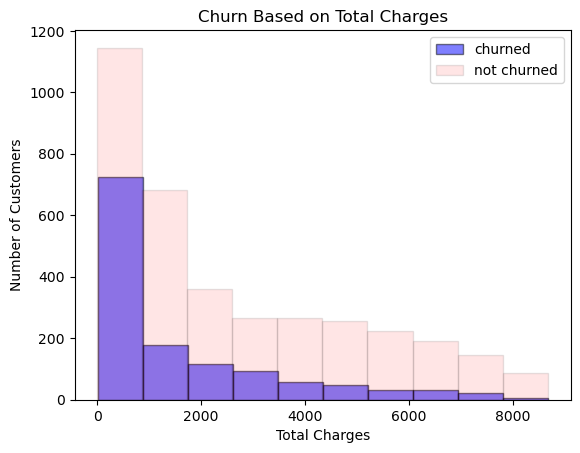

In [63]:
plt.hist(x = churn, color = 'blue', alpha = .5, edgecolor = 'black', label = 'churned')
plt.hist(x = not_churned, color = 'red', alpha = .1, edgecolor = 'black', label = 'not churned')
plt.legend(loc = 'upper right')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.title('Churn Based on Total Charges')
plt.show()
# Creating two histograms to overlay on each other using monthly charges
# Seperated by churn status

In [64]:
# Churn based on total charges proves unhelpful